In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
train = pd.read_csv('data/credit_train_final.csv.zip', index_col='client_id', compression='gzip')
test = pd.read_csv('data/credit_test_final.csv.zip', index_col='client_id', compression='gzip')

In [3]:
train.columns

Index(['age', 'credit_month', 'credit_sum', 'education', 'gender',
       'job_position', 'marital_status', 'monthly_income', 'open_account_flg',
       'score_shk', 'tariff_id', 'lat', 'lon', 'overdue_credit_count',
       'credit_count', 'living_region'],
      dtype='object')

In [4]:
train[train['open_account_flg'] == 0].describe()

,age,credit_month,credit_sum,monthly_income,open_account_flg,score_shk,lat,lon,overdue_credit_count,credit_count
count,140690.000000,140690.000000,140690.000000,140690.000000,140690.0,140690.000000,140690.000000,140690.000000,140690.000000,140690.000000
mean,36.648703,10.938560,26635.610440,40412.520129,0.0,0.466677,55.357849,54.476893,0.044172,2.055274
std,10.341581,3.410549,16459.360531,25402.503007,0.0,0.123417,5.282834,25.037037,0.202518,1.722167
min,18.000000,3.000000,2736.000000,5000.000000,0.0,0.000000,42.869937,21.229930,0.000000,0.000000
25%,28.000000,10.000000,15043.000000,25000.000000,0.0,0.376467,53.276350,37.617635,0.000000,1.000000
50%,35.000000,10.000000,21600.000000,35000.000000,0.0,0.458822,55.755814,44.634151,0.000000,2.000000
75%,43.000000,12.000000,32990.000000,50000.000000,0.0,0.550309,58.586755,60.395641,0.000000,3.000000
max,71.000000,36.000000,200000.000000,950000.000000,0.0,1.128291,67.714212,174.432311,3.000000,19.000000


In [5]:
train[train['open_account_flg'] == 1].describe()

,age,credit_month,credit_sum,monthly_income,open_account_flg,score_shk,lat,lon,overdue_credit_count,credit_count
count,30056.000000,30056.000000,30056.000000,30056.000000,30056.0,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000
mean,35.788495,11.178234,23564.712491,38854.457945,1.0,0.482562,55.380273,56.631279,0.054509,2.146883
std,11.428049,4.069853,14880.805257,23250.872620,0.0,0.127364,5.412849,27.189832,0.222116,1.818152
min,18.000000,3.000000,3000.000000,5000.000000,1.0,0.072468,42.869937,21.229930,0.000000,0.000000
25%,27.000000,10.000000,13826.785000,25000.000000,1.0,0.393612,53.276350,37.617635,0.000000,1.000000
50%,33.000000,10.000000,19789.000000,35000.000000,1.0,0.473374,55.755814,45.063654,0.000000,2.000000
75%,43.000000,12.000000,28778.000000,48000.000000,1.0,0.562660,58.586755,61.530761,0.000000,3.000000
max,71.000000,36.000000,174000.000000,500000.000000,1.0,1.054699,67.714212,174.432311,3.000000,21.000000


In [6]:
train['monthly_income'].unique().size

1591

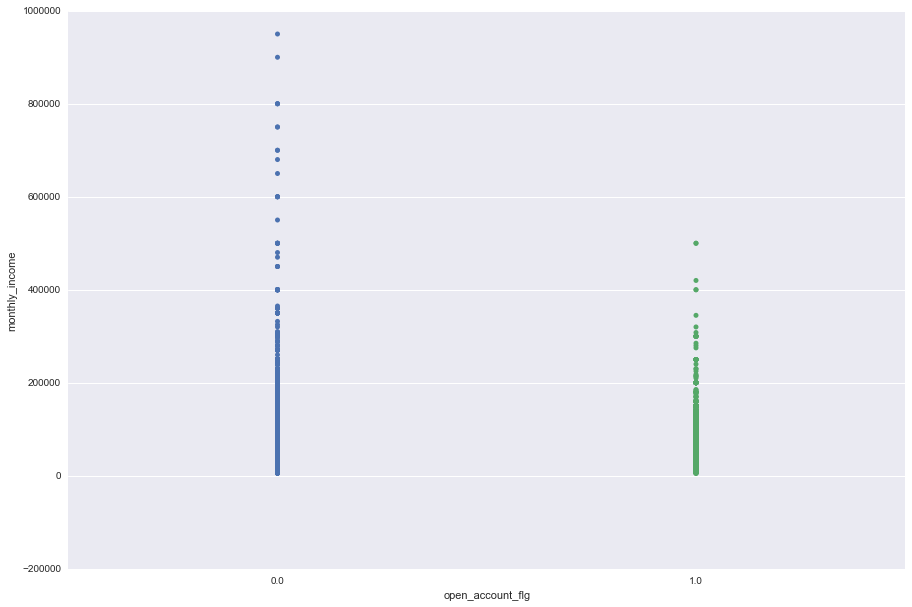

In [7]:
sns.stripplot(x='open_account_flg', y='monthly_income', data=train)

In [8]:
np.round(np.power(train['monthly_income'], 0.25), decimals=2).unique().size

906

In [9]:
train['credit_sum'].unique().size

42769

In [10]:
np.round(train['credit_sum'], 0).unique().size

34589

In [11]:
np.round(train['credit_sum'] / 1.5, 0).unique().size

27498

In [12]:
np.round(np.log(train['credit_sum']), decimals=4).unique().size

21988

In [13]:
train['age'].unique().size

54

In [14]:
np.round(np.power(train['age'], 0.45), decimals=1).unique().size

32

In [15]:
print(train['lat'].unique().size)
np.round(train['lat'], decimals=2).unique().size

289


238

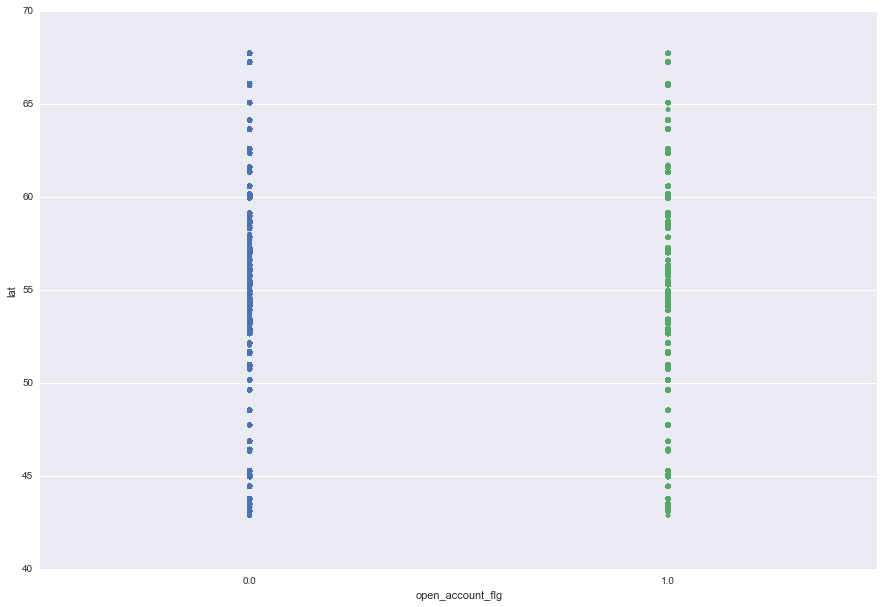

In [16]:
sns.stripplot(x='open_account_flg', y='lat', data=train)

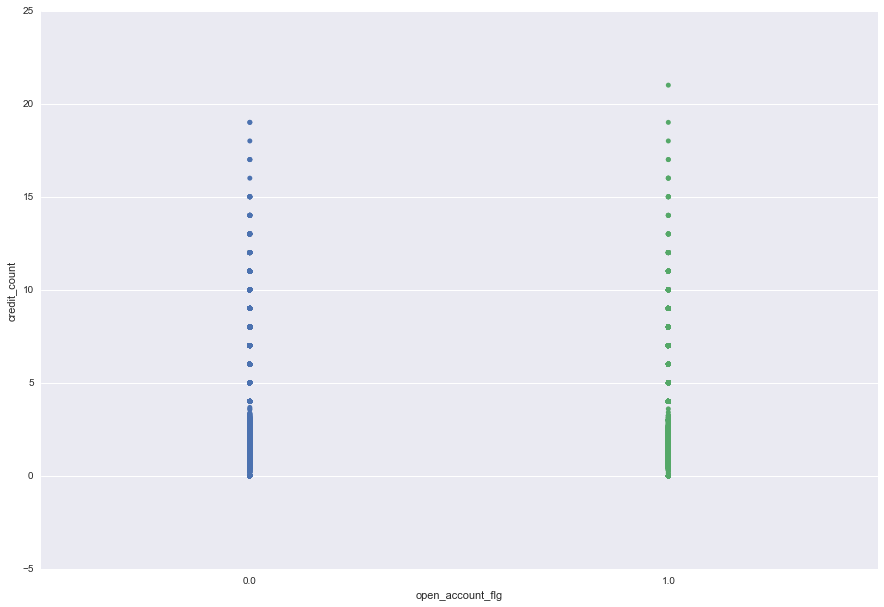

In [17]:
sns.stripplot(x='open_account_flg', y='credit_count', data=train)

In [18]:
print(train['credit_count'].unique().size) # 9114!!! ЧТО?????
print(np.round(train['credit_count'], 0).unique())
print(np.round(train['credit_count'], 0).unique().size)

9114
[  1.   2.   5.   0.   3.   7.   4.   6.   8.  10.   9.  12.  11.  14.  15.
  13.  16.  19.  17.  18.  21.]
21


In [19]:
print(train['overdue_credit_count'].unique().size) # 6857?!!
print(np.round(train['overdue_credit_count'], 0).unique())
print(np.round(train['overdue_credit_count'], 0).unique().size)

6857
[ 1.  0.  2.  3.]
4


In [20]:
(train['credit_sum'] / train['credit_month']).unique().size

60167

In [21]:
np.round(train['credit_sum'] / train['credit_month'], 1).unique().size

37726

In [22]:
def optimize(data):
    data['monthly_income'] = np.round(np.power(data['monthly_income'], 0.25), decimals=2)
    data['credit_sum'] = np.round(np.log(data['credit_sum']), decimals=4)
    data['age'] = np.round(np.power(data['age'], 0.45), decimals=1)
    data['lat'] = np.round(data['lat'], decimals=2)
    data['lon'] = np.round(data['lon'], decimals=2)
    data['credit_count'] = np.round(data['credit_count'], 0)
    data['overdue_credit_count'] = np.round(data['overdue_credit_count'], 0)

In [23]:
def generate_new_values(data):
    data['monthly_credit'] = np.round((data['credit_sum'] / data['credit_month']).fillna(0), 1)
    data['credit_count_ratio'] = (data['overdue_credit_count'] / data['credit_count']).fillna(0)
    data['credit_income_ratio'] = np.round((data['monthly_income'] / data['monthly_credit']).fillna(0), 1)

In [24]:
generate_new_values(train)
generate_new_values(test)

optimize(train)
optimize(test)

In [25]:
train.head()

,age,credit_month,credit_sum,education,gender,job_position,marital_status,monthly_income,open_account_flg,score_shk,tariff_id,lat,lon,overdue_credit_count,credit_count,living_region,monthly_credit,credit_count_ratio,credit_income_ratio
client_id,,,,,,,,,,,,,,,,,,,
1,5.7,10,11.0021,GRD,M,UMN,MAR,13.16,0.0,0.770249,"1,6",45.27,38.95,1.0,1.0,КРАСНОДАРСКИЙ,5999.8,1.0,5.0
2,4.5,6,9.2955,GRD,F,UMN,MAR,14.40,0.0,0.248514,"1,1",55.76,37.62,0.0,2.0,МОСКОВСКАЯ,1814.8,0.0,23.7
3,4.8,12,9.2806,SCH,M,SPC,MAR,12.31,0.0,0.459589,"1,1",51.58,46.80,0.0,5.0,САРАТОВСКАЯ,894.0,0.0,25.7
4,4.4,12,9.3934,GRD,F,SPC,DIV,11.42,0.0,0.362536,"1,1",49.62,44.15,0.0,2.0,ВОЛГОГРАДСКАЯ,1000.8,0.0,17.0
5,5.5,10,9.7356,SCH,M,SPC,MAR,12.57,0.0,0.421385,"1,1",54.45,60.40,0.0,1.0,ЧЕЛЯБИНСКАЯ,1690.9,0.0,14.8


In [30]:
train['credit_count_ratio'] = (train['overdue_credit_count'] / train['credit_count']).fillna(0)

In [32]:
train.to_csv('data/credit_train_final_optimized.csv.gz', compression='gzip')
test.to_csv('data/credit_test_final_optimized.csv.gz', compression='gzip')